**czasy**

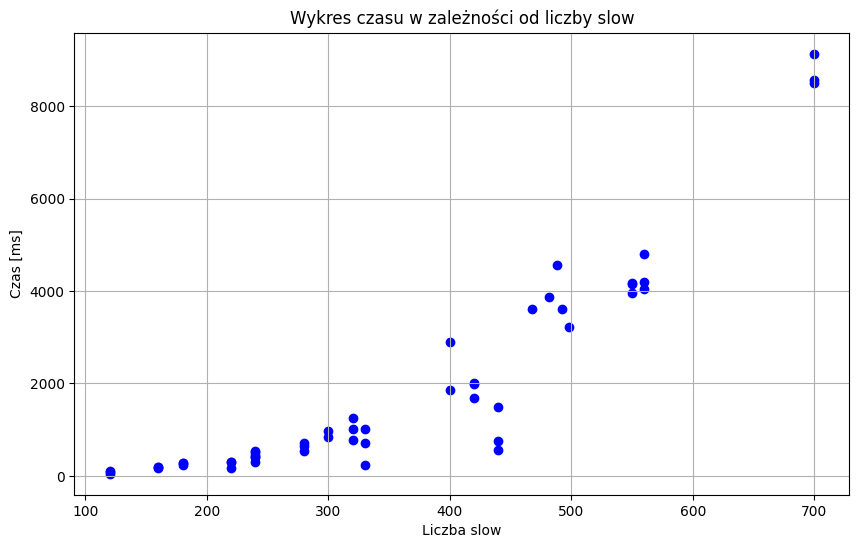

In [7]:
import matplotlib.pyplot as plt

# Funkcja do odczytywania danych z pliku i tworzenia wykresów
def create_plots(file_path):
    with open(file_path, 'r') as file:
        data = file.readlines()

    all_data = {"dlugosc_danych": [], "czas_w_ms": []}

    # Przejdź przez wszystkie linie w pliku
    for line in data:
        # Sprawdź czy linia zawiera rzeczywiste dane (nie rozpoczyna się od "Folder:")
        if not line.startswith("Folder:"):
            # Podziel linię na elementy, korzystając z separatora ";"
            values = line.strip().split(";")
            # Sprawdź czy liczba kolumn jest wystarczająca
            if len(values) >= 6:
                # Parsuj wartości dla "dlugosc_danych" i "czas_w_ms"
                try:
                    dlugosc_danych = int(values[3])
                    czas_w_ms = int(values[5])
                    # Dodaj wartości do słownika all_data
                    all_data["dlugosc_danych"].append(dlugosc_danych)
                    all_data["czas_w_ms"].append(czas_w_ms)
                except ValueError:
                    # W razie problemu z parsowaniem, pomijamy tę linię
                    pass

    # Tworzenie wykresu punktowego
    plt.figure(figsize=(10, 6))
    plt.scatter(all_data["dlugosc_danych"], all_data["czas_w_ms"], marker='o', color='b')
    plt.xlabel("Liczba slow")
    plt.ylabel("Czas [ms]")
    plt.title("Wykres czasu w zależności od liczby slow")
    plt.grid(True)
    plt.show()

# Ścieżka do pliku
file_path = "wyniki2.txt"

# Wywołanie funkcji z podaną ścieżką do pliku
create_plots(file_path)



**reszta**

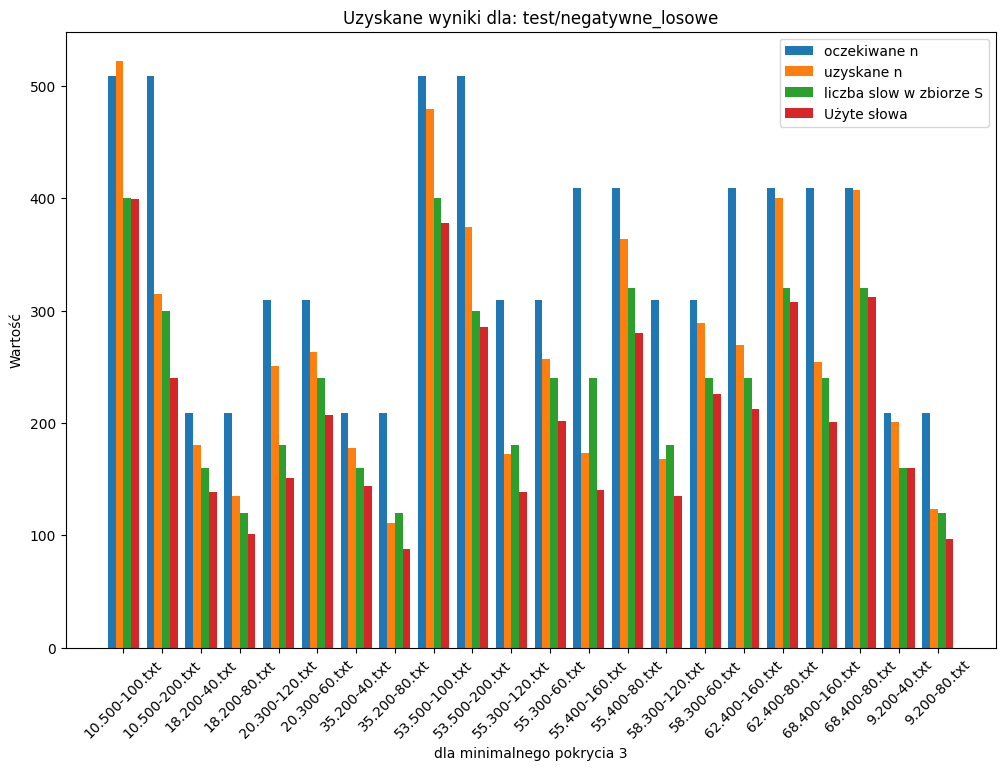

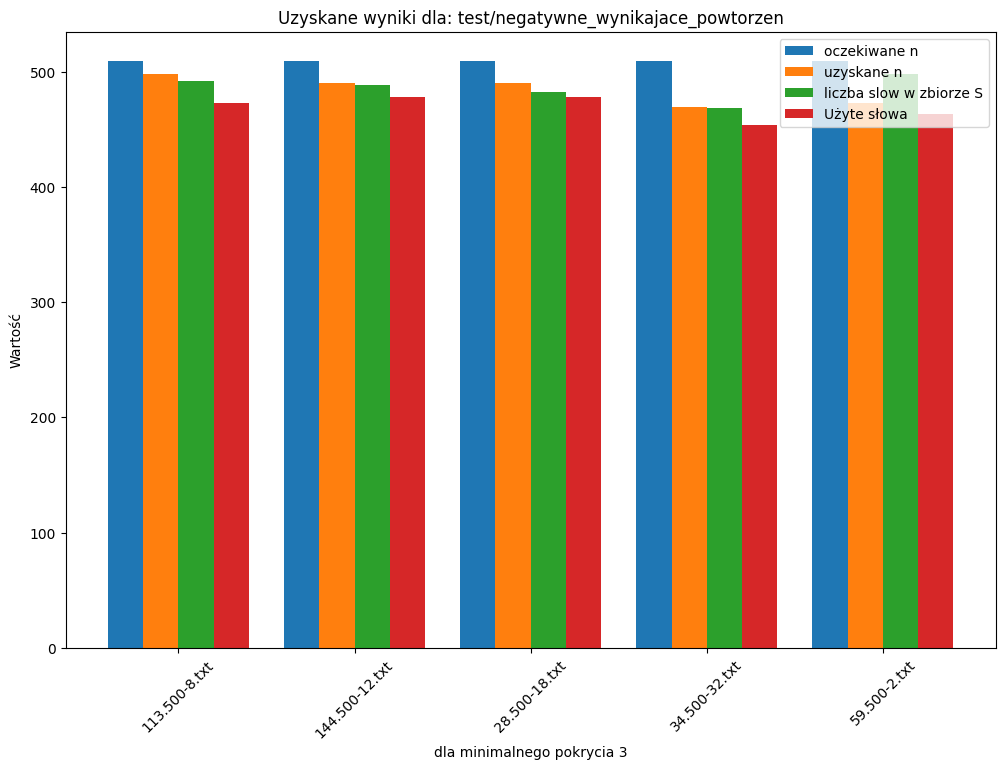

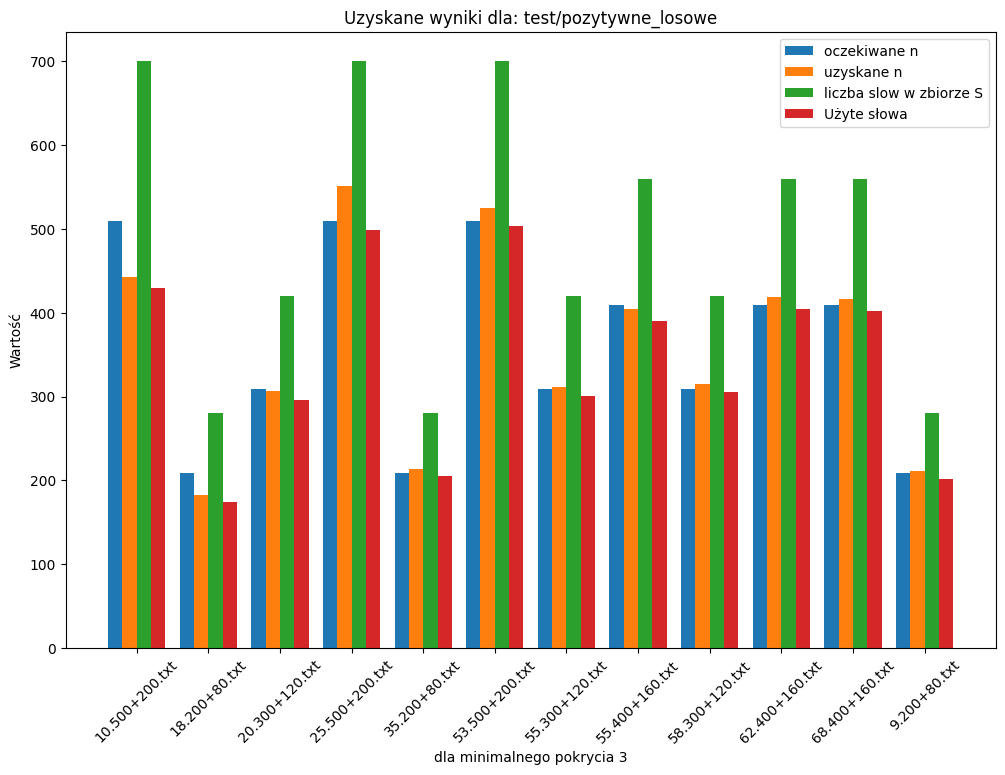

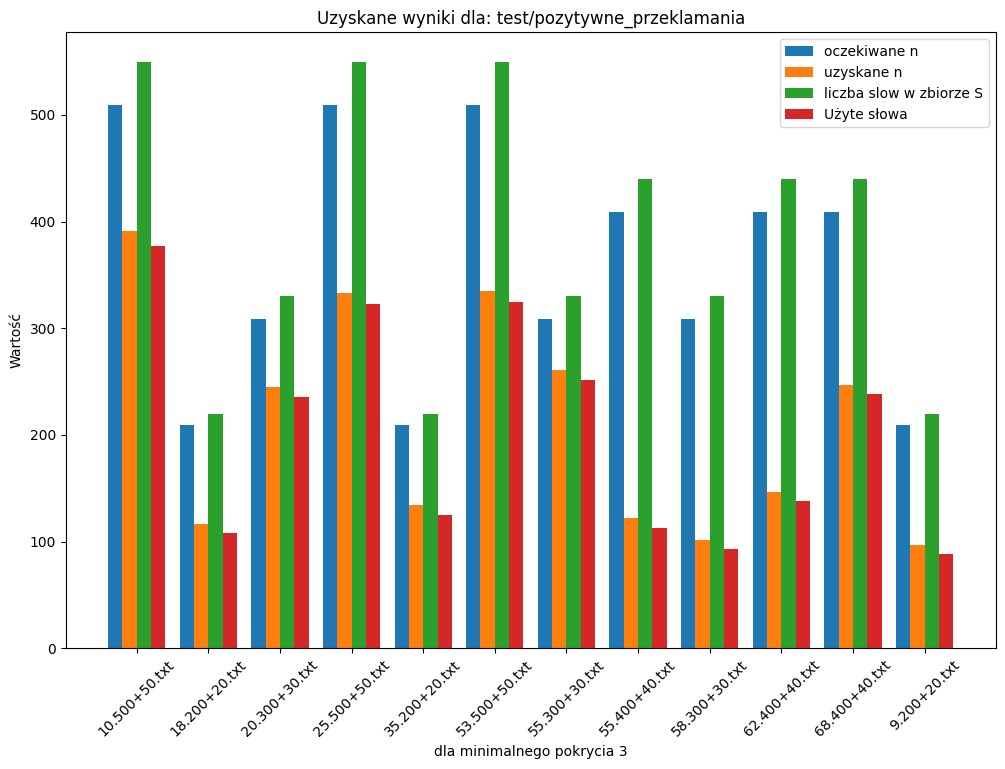

In [9]:
import matplotlib.pyplot as plt

# Funkcja do odczytywania danych z pliku i tworzenia wykresów
def create_plots(file_path):
    with open(file_path, 'r') as file:
        data = file.readlines()

    folders = {}
    current_folder = None

    for line in data:
        if line.startswith("Folder:"):
            current_folder = line.split(":")[-1].strip()
            folders[current_folder] = {"nazwa": [], "oczekiwane n": [], "uzyskane n": [], "liczba slow w zbiorze S": [], "uzyte_slowa": [], "czas_w_ms": []}
        else:
            if current_folder is not None:  # Dodaj warunek, żeby sprawdzić czy current_folder nie jest None
                values = line.split(";")
                folders[current_folder]["nazwa"].append(values[0])
                folders[current_folder]["oczekiwane n"].append(int(values[1]))
                folders[current_folder]["uzyskane n"].append(int(values[2]))
                folders[current_folder]["liczba slow w zbiorze S"].append(int(values[3]))
                folders[current_folder]["uzyte_slowa"].append(int(values[4]))
                folders[current_folder]["czas_w_ms"].append(int(values[5]))

    # Tworzenie wykresów słupkowych
    for folder, folder_data in folders.items():
        plt.figure(figsize=(12, 8))  # Zwiększenie rozmiaru wykresu dla lepszej czytelności
        # Ustawienie szerokości słupków i odstępu między nimi
        bar_width = 0.2
        index = range(len(folder_data["nazwa"]))
        plt.bar(index, folder_data["oczekiwane n"], width=bar_width, label="oczekiwane n")
        plt.bar([i + bar_width for i in index], folder_data["uzyskane n"], width=bar_width, label="uzyskane n")
        plt.bar([i + 2 * bar_width for i in index], folder_data["liczba slow w zbiorze S"], width=bar_width, label="liczba slow w zbiorze S")
        plt.bar([i + 3 * bar_width for i in index], folder_data["uzyte_slowa"], width=bar_width, label="Użyte słowa")
        plt.xlabel("dla minimalnego pokrycia 4")
        plt.ylabel("Wartość")
        plt.title(f"Uzyskane wyniki dla: {folder}")
        plt.xticks([i + 1.5 * bar_width for i in index], folder_data["nazwa"], rotation=45)
        plt.legend()
        plt.show()

        '''# Tworzenie wykresu punktowego
        plt.figure(figsize=(10, 6))
        plt.scatter(folder_data["dlugosc_danych"], folder_data["czas_w_ms"], marker='o', color='b')
        plt.xlabel("Długość danych")
        plt.ylabel("Czas [ms]")
        plt.title(f"Wykres punktowy czasu dla folderu: {folder}")
        plt.grid(True)
        plt.show()'''

# Ścieżka do pliku
file_path = "wyniki4.txt"

# Wywołanie funkcji z podaną ścieżką do pliku
create_plots(file_path)

